<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПОСТРОЕНИЕ ПАЙПЛАЙНА
ОДНОМЕРНОЙ РЕГРЕССИИ

Выполнила работа Омарова Джума группа ПИН-б-о-22-1

# **Первичный анализ**

---

Описание набора данных:

Назначение: Набор данных содержит финансовые показатели компании McDonald's, такие как выручка, прибыль, рыночная капитализация, коэффициенты P/E, P/S, P/B, показатель операционной прибыльности и другие.

Практические задачи: На основе этих данных можно проводить финансовый анализ производительности и стабильности компании McDonald's, прогнозировать ее финансовые показатели, а также оценивать инвестиционные возможности.

---

Описание признаков и их тип:

Year (год) - числовой (целочисленный)
Market cap (рыночная капитализация) - числовой (денежный)

Revenue (выручка) - числовой (денежный)

Earnings (прибыль) - числовой (денежный)

P/E ratio (P/E коэффициент) - числовой (денежный)

P/S ratio (P/S коэффициент) - числовой (денежный)

P/B ratio (P/B коэффициент) - числовой (денежный)

Operating Margin (операционная прибыльность) - числовой (процентный)

EPS (прибыль на акцию) - числовой (денежный)

Shares Outstanding (выпущенные акции) - числовой (целочисленный)

Cash on Hand (наличные средства) - числовой (денежный)

Dividend Yield (дивидендная доходность) - числовой (процентный)

Dividend (adjusted) (дивиденды, скорректированные на разделение акций) - числовой (денежный)

Net assets (чистые активы) - числовой (денежный)

Total assets (общие активы) - числовой (денежный)

Total debt (общий долг) - числовой (денежный)

Total liabilities (общие обязательства) - числовой (денежный)

---

Форма набора данных:

Количество элементов: 21 строка (за каждый год с 2002 по 2022)

Количество признаков: 16 столбцов

Количество пропущенных значений: пропущенных значений нет.

### Статистические показатели

In [ ]:
# Рассчитать статистические показатели
stats = data.describe()

# Вывести статистические показатели
print(stats)

              Year  Market cap ($B)  Revenue ($B)  Earnings ($B)  P/E ratio  \
count    21.000000        21.000000     21.000000      21.000000  21.000000   
mean   2012.000000        96.824286     22.706190       6.214762  21.661905   
std       6.204837        50.396346      3.398316       2.226166   5.541974   
min    2002.000000        20.390000     15.400000       1.660000  15.000000   
25%    2007.000000        67.220000     20.810000       3.880000  16.500000   
50%    2012.000000        90.220000     22.820000       6.860000  21.400000   
75%    2017.000000       136.210000     24.620000       8.010000  24.800000   
max    2022.000000       200.310000     28.100000       9.120000  33.800000   

       P/S ratio  P/B ratio  Operating Margin (%)    EPS ($)  \
count  21.000000  21.000000             21.000000  21.000000   
mean    4.234762  -7.100000             26.889048   4.852857   
std     2.266896  19.356029              8.355580   2.507501   
min     1.320000 -45.900000     

Импорт библиотеки Pandas: Это необходимо для работы с данными в формате DataFrame, который предоставляется Pandas. В вашем случае, import pandas as pd используется для импорта Pandas и сокращения имени библиотеки до pd, что удобно для последующего использования.

Загрузка данных: pd.read_csv('dataset/McDonalds_financial_statements.csv') загружает данные из файла CSV. Файл McDonalds_financial_statements.csv содержит, вероятно, финансовые данные о компании McDonalds. Функция pd.read_csv() используется для чтения данных из CSV файла и создания DataFrame из этих данных. DataFrame - это основная структура данных в Pandas, которая представляет собой таблицу с данными, где строки - это наблюдения, а столбцы - это переменные.

Инспекция данных: После загрузки данных в переменную data, их можно дополнительно изучить, используя различные методы Pandas, такие как data.head() для просмотра первых нескольких строк данных, data.info() для получения общей информации о данных, а также data.describe() для получения статистического описания числовых переменных.

Предварительная обработка данных: В процессе анализа данных может потребоваться выполнить предварительную обработку, такую как удаление или заполнение пропущенных значений, преобразование типов данных, объединение нескольких наборов данных и т.д.

Визуализация данных: Для лучшего понимания данных и выявления закономерностей может быть полезна визуализация данных с использованием библиотеки Matplotlib или Seaborn.

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('dataset/McDonalds_financial_statements.csv')

data

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
5,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
6,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
7,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85
8,2014,90.22,27.44,7.37,19.2,3.29,7.02,26.86,4.87,0.96,2.07,3.50,3.28,12.85,34.28,14.98,21.42
9,2013,96.09,28.10,8.20,17.3,3.42,6.00,29.19,5.60,0.99,2.79,3.22,3.12,16.00,36.62,14.12,20.61


## **Подзадача 1. Построение логического классификатора с заданием max_depth (максимальной глубины) и max_features (максимального количества признаков) пользователем (установить любые)**

Импорт необходимых библиотек: Импортируются необходимые библиотеки, такие как DecisionTreeRegressor из sklearn.tree для создания регрессионного дерева, train_test_split из sklearn.model_selection для разделения данных на обучающую и тестовую выборки, и matplotlib.pyplot для визуализации результатов.

Выбор признаков и целевой переменной: Из данных удаляются признаки Year и Market cap ($B), так как они предполагаются как идентификаторы и целевая переменная соответственно. Оставшиеся признаки используются как матрица признаков X, а целевая переменная y - это столбец Market cap ($B).

Разделение данных на обучающую и тестовую выборки: Функция train_test_split используется для разделения данных на обучающую и тестовую выборки в соотношении 80/20.

Создание и обучение модели регрессионного дерева: Создается экземпляр регрессионного дерева с заданными параметрами max_depth и max_features, а затем модель обучается на обучающих данных с помощью метода fit.

Визуализация регрессионного дерева: С помощью функции plot_tree из библиотеки sklearn.tree строится дерево решений, визуализирующее процесс принятия решений моделью. Размер и внешний вид графика настраиваются с помощью функций plt.figure и plt.show.

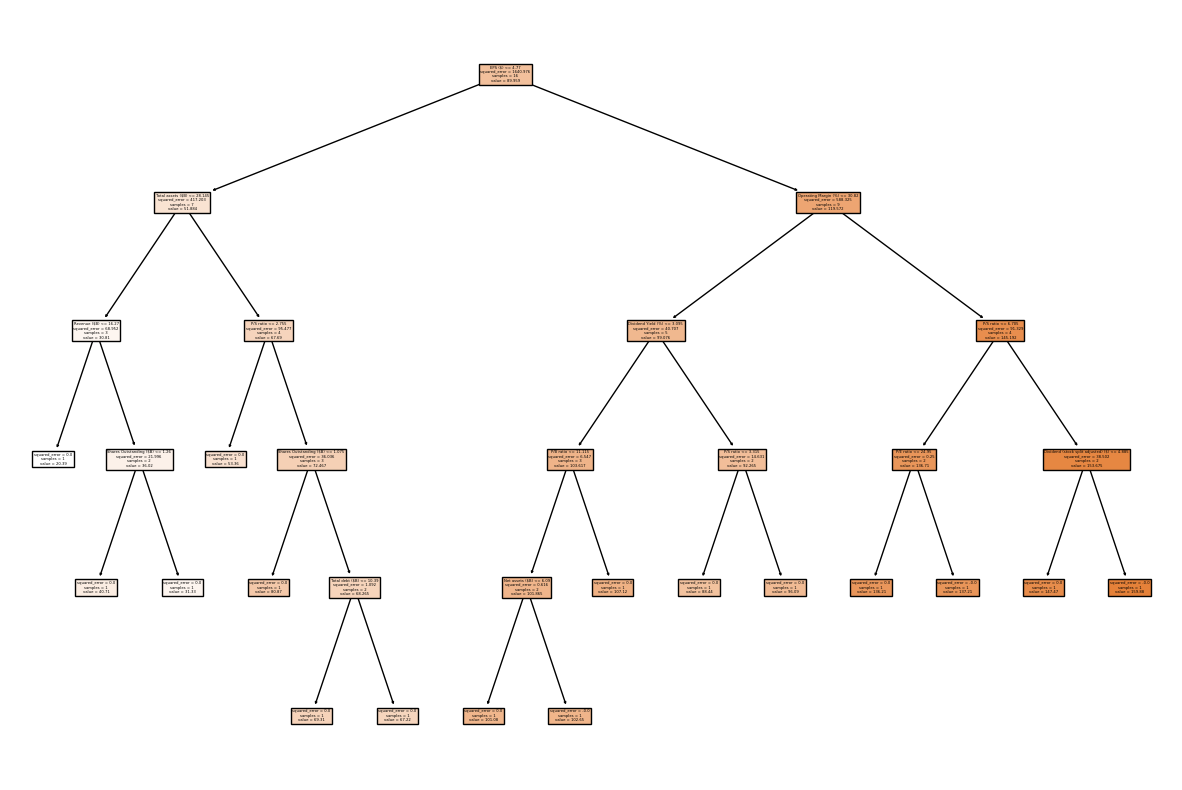

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Выбор признаков и целевой переменной
X = data.drop(['Year', 'Market cap ($B)'], axis=1)
y = data['Market cap ($B)']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание регрессионного дерева с заданными параметрами
clf = DecisionTreeRegressor(max_depth=5, max_features=5)

# Обучение регрессионного дерева
clf.fit(X_train, y_train)

# Визуализация регрессионного дерева
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

## **Подзадача 2. Вычисление оценки cross validation (MSE) для различно значений max_depth (построить график зависимости)**

Импорт необходимых библиотек: Импортируются классы DecisionTreeRegressor для создания модели регрессионного дерева, cross_val_score для выполнения перекрестной проверки, mean_squared_error для оценки среднеквадратичной ошибки, numpy для работы с массивами данных, и matplotlib.pyplot для визуализации результатов.

Определение списка глубин дерева и списка для хранения оценок MSE: Генерируется список max_depths, который содержит целые значения от 1 до 30 включительно, представляющие возможные значения глубины дерева. Создается также пустой список mse_scores, который будет хранить оценки MSE для каждой глубины дерева.

Цикл для обучения моделей с разными глубинами: В цикле проходятся все значения глубины дерева из списка max_depths. Для каждой глубины создается экземпляр модели DecisionTreeRegressor с заданной глубиной, затем модель обучается на обучающих данных. После этого используется перекрестная проверка с помощью функции cross_val_score для оценки качества модели на обучающих данных с использованием 5 фолдов. Оценка среднеквадратичной ошибки для обучающих данных вычисляется с помощью функции mean_squared_error и добавляется в список mse_scores.

Построение графика зависимости MSE от глубины дерева: После завершения цикла строится график, где по оси X отображаются значения глубины дерева, а по оси Y - оценки MSE. Этот график поможет выбрать оптимальное значение глубины дерева, при котором достигается минимальное значение MSE на обучающих данных.

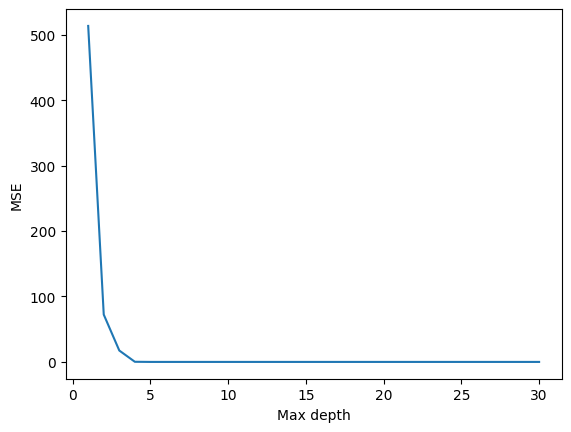

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

max_depths = np.linspace(1, 30, 30, dtype=int)
mse_scores = []

for max_depth in max_depths:
    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)  # Обучение модели
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mse_scores.append(mean_squared_error(y_train, clf.predict(X_train)))

# Построение графика зависимости
plt.plot(max_depths, mse_scores)
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.show()

## **Подзадача 3. Вычисление оценки cross validation (MSE) для различно значений max_features (построить график зависимости)**

Импорт необходимых библиотек: Импортируются классы DecisionTreeRegressor, cross_val_score, mean_squared_error, а также библиотеки numpy и matplotlib.pyplot.

Определение списка максимального количества признаков и списка для хранения оценок MSE: Генерируется список max_features, который содержит целые значения от 1 до количества признаков в данных X. Создается также пустой список mse_scores, который будет хранить оценки MSE для каждого значения количества признаков.

Цикл для обучения моделей с разным количеством признаков: В цикле проходятся все значения количества признаков из списка max_features. Для каждого значения создается экземпляр модели DecisionTreeRegressor с заданным количеством признаков, затем модель обучается на обучающих данных. После этого используется перекрестная проверка с помощью функции cross_val_score для оценки качества модели на обучающих данных с использованием 5 фолдов. Оценка среднеквадратичной ошибки для обучающих данных вычисляется с помощью функции mean_squared_error и добавляется в список mse_scores.

Построение графика зависимости MSE от количества признаков: После завершения цикла строится график, где по оси X отображаются значения количества признаков, а по оси Y - оценки MSE. Этот график поможет выбрать оптимальное количество признаков для построения модели.

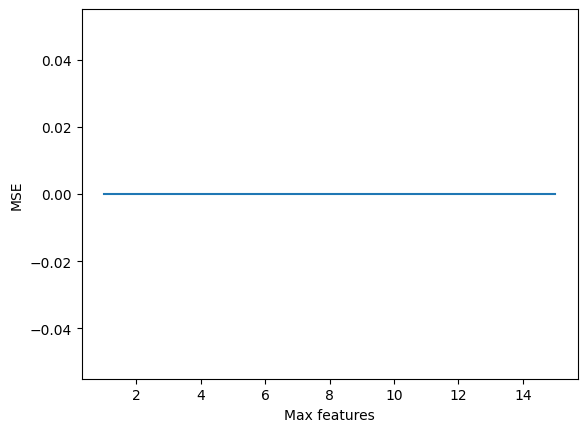

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

max_features = np.linspace(1, X.shape[1], X.shape[1], dtype=int)
mse_scores = []

for max_feature in max_features:
    clf = DecisionTreeRegressor(max_features=max_feature)
    clf.fit(X_train, y_train)  # Обучение модели
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mse_scores.append(mean_squared_error(y_train, clf.predict(X_train)))

# Построение графика зависимости
plt.plot(max_features, mse_scores)
plt.xlabel('Max features')
plt.ylabel('MSE')
plt.show()

## **Подзадача 4. Вычислите оптимальные значения max_depth и max_features. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора.**

Импорт необходимых библиотек: Импортируются классы DecisionTreeRegressor, cross_val_score, mean_squared_error, а также библиотеки numpy и matplotlib.pyplot.

Определение диапазонов значений для гиперпараметров: Задаются диапазоны значений max_depths и max_features для перебора гиперпараметров.

Создание списка для хранения оценок MSE: Создается пустой список mse_scores, в который будут добавляться оценки MSE для каждой комбинации значений гиперпараметров.

Цикл для перебора комбинаций гиперпараметров: Вложенные циклы проходятся по всем значениям max_depths и max_features. Для каждой комбинации значений создается экземпляр модели DecisionTreeRegressor, который затем обучается на обучающих данных. После этого вычисляется оценка MSE с помощью перекрестной проверки и добавляется в список mse_scores.

Нахождение оптимальных значений гиперпараметров: После завершения перебора комбинаций находится минимальное значение MSE и соответствующие ему значения max_depth и max_features.

Печать оптимальных значений: Найденные оптимальные значения max_depth и max_features выводятся на экран.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for max_depth
max_depths = np.linspace(1, 32, 32, dtype=int)

# Define the range of values for max_features as integers
max_features = np.arange(1, X.shape[1] + 1)

# List to store MSE scores
mse_scores = []

# Iterate over max_depths and max_features values
for max_depth in max_depths:
    for max_feature in max_features:
        # Create DecisionTreeRegressor with specified max_depth and max_features
        clf = DecisionTreeRegressor(max_depth=max_depth, max_features=max_feature)

        # Fit the model to the training data
        clf.fit(X_train, y_train)

        # Compute MSE score using cross-validation
        scores = cross_val_score(clf, X_train, y_train, cv=5)

        # Append MSE score to the list
        mse_scores.append(mean_squared_error(y_train, clf.predict(X_train)))

# Convert the list of MSE scores to a numpy array
mse_scores = np.array(mse_scores).reshape((len(max_depths), len(max_features)))

# Find the minimum MSE score
min_mse = np.min(mse_scores)
min_mse_idx = np.where(mse_scores == min_mse)

# Optimal values for max_depth and max_features
optimal_max_depth = max_depths[min_mse_idx[0][0]]
optimal_max_features = max_features[min_mse_idx[1][0]]

# Print the optimal values
print("Optimal max_depth:", optimal_max_depth)
print("Optimal max_features:", optimal_max_features)

Optimal max_depth: 5
Optimal max_features: 2


## **Подзадача 5. Выведите дерево в формате .png**

Визуализация регрессионного дерева: С помощью функции plot_tree из библиотеки sklearn.tree строится дерево решений, визуализирующее процесс принятия решений моделью. Размер и внешний вид графика настраиваются с помощью функций plt.figure и plt.show.

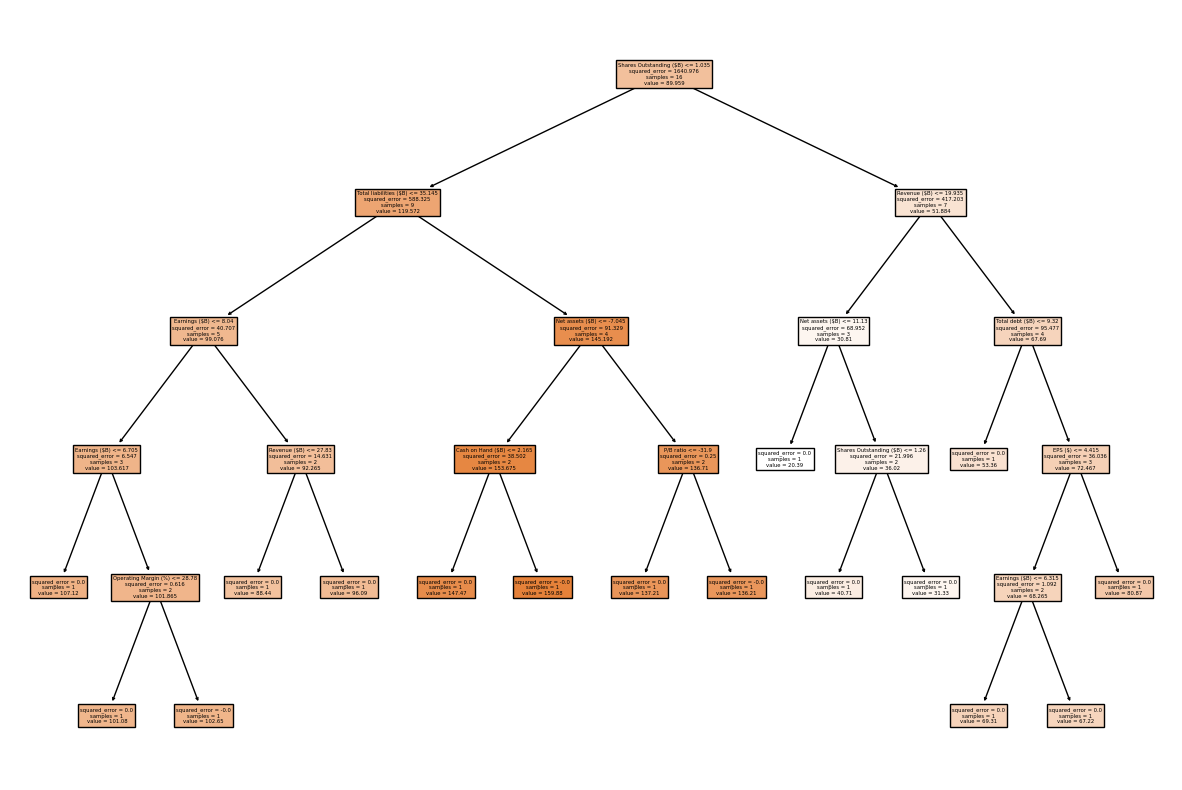

In [ ]:
# Визуализация регрессионного дерева
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

## **Подзадача 6. Выведите решающие границы полученной модели**




Импорт необходимых библиотек: В начале кода происходит импорт необходимых библиотек, таких как pandas для работы с данными, numpy для вычислений, matplotlib для визуализации, и scikit-learn для построения модели машинного обучения.

Загрузка данных: Данные загружаются из CSV-файла, предположительно содержащего финансовые данные компании McDonald's.

Предварительная обработка данных: Создаются категории для маркет-капитализации на основе столбца "Market cap ($B)". Это может быть важным этапом, поскольку конвертация числовых данных в категории может улучшить процесс обучения модели и упростить интерпретацию результатов.

Выбор признаков и целевой переменной: Из данных выделяются признаки (X), которые будут использоваться для обучения модели, и целевая переменная (y), которую модель будет пытаться предсказать.

Разделение данных на обучающую и тестовую выборки: Данные разделяются на обучающую и тестовую выборки для оценки производительности модели.

Создание и обучение модели: Создается модель классификатора дерева решений с определенными параметрами (максимальная глубина и максимальное количество признаков). Затем модель обучается на обучающих данных.

Визуализация решающих границ: Последний этап включает визуализацию дерева решений, чтобы лучше понять, как модель принимает решения на основе входных данных.

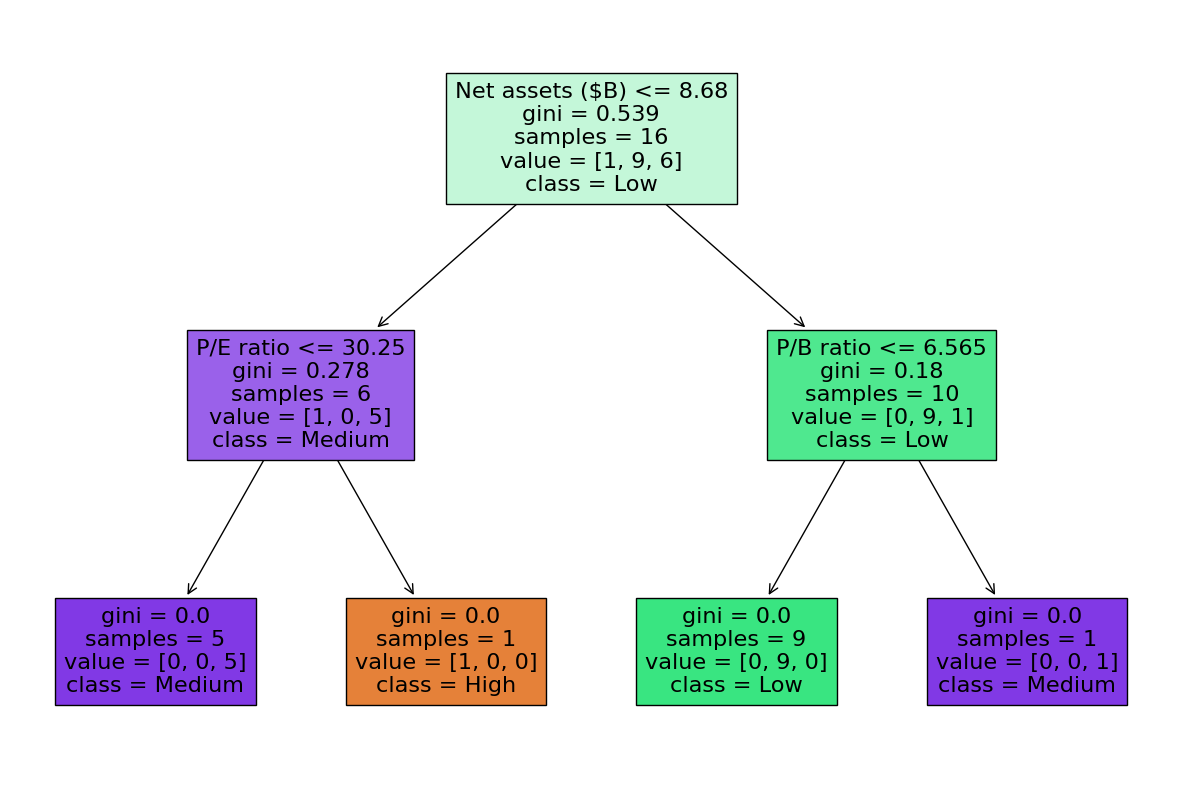

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('dataset/McDonalds_financial_statements.csv')

# Создание категорий для маркет-капитализации: Низкая, Средняя, Высокая
bins = [-np.inf, 100, 150, np.inf]
labels = ['Low', 'Medium', 'High']
data['Market cap category'] = pd.cut(data['Market cap ($B)'], bins=bins, labels=labels)

# Выбор признаков и целевой переменной
X = data.drop(['Year', 'Market cap ($B)', 'Market cap category'], axis=1)
y = data['Market cap category']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание классификатора дерева решений с заданными параметрами
clf = DecisionTreeClassifier(max_depth=5, max_features=5)

# Обучение модели
clf.fit(X_train, y_train)

# Визуализация решающих границ
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=np.unique(y), filled=True)
plt.show()

## **Вывод:**

Общий вывод состоит в том, что данный код представляет собой пример типичного процесса анализа данных и построения модели машинного обучения в контексте Data Science. В нем содержатся основные этапы работы с данными:

Подготовка данных: Загрузка и предварительная обработка данных, включая создание категорий для целевой переменной.

Разделение данных: Разделение данных на обучающую и тестовую выборки для оценки производительности модели.

Построение модели: Создание и обучение модели машинного обучения, в данном случае, классификатора дерева решений.

Оценка модели: Визуализация модели для понимания ее принятия решений и оценка ее производительности на тестовой выборке.

Этот процесс позволяет исследователям и аналитикам извлекать полезную информацию из данных и строить модели для прогнозирования или классификации различных явлений. В данном случае, модель может использоваться для прогнозирования маркет-капитализации компании McDonald's на основе ее финансовых показателей.


### 1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

При реализации линейной модели регрессии нет необходимости в масштабировании признаков, потому что линейная регрессия основана на предположении о линейной зависимости между признаками и целевой переменной. Коэффициенты модели (веса) могут быть интерпретированы независимо от масштаба признаков. Однако масштабирование может быть полезным для улучшения сходимости алгоритмов оптимизации, таких как градиентный спуск, особенно если признаки имеют сильно различающиеся диапазоны значений.

### 2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?

Квадратичное отклонение (среднеквадратичная ошибка) используется в линейной регрессии по нескольким причинам:

1. **Дифференцируемость**: Квадратичная функция гладкая и дифференцируема, что упрощает вычисление градиентов для оптимизации.
2. **Наказание за большие ошибки**: Квадратичное отклонение значительно увеличивает штраф за большие отклонения, что делает модель более чувствительной к выбросам.
3. **Удобство математических операций**: Использование квадратов позволяет легко применять методы линейной алгебры, такие как матричное умножение.

### 3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

Метод `fit(X, y)` класса `LinearRegression` выполняет следующие действия:

1. **Обучение модели**: Метод принимает матрицу признаков \( X \) и вектор целевой переменной \( y \).
2. **Расчет коэффициентов**: Он вычисляет оптимальные значения коэффициентов (весов) линейной модели, минимизируя функцию потерь (обычно среднеквадратичную ошибку).
3. **Хранение результатов**: Полученные коэффициенты сохраняются в атрибутах класса для последующего использования.

### 4. Что такое p-значение? Как p-значение используется при оптимизации моделей регрессии?

**p-значение** — это статистическая мера, которая помогает определить значимость результатов тестирования гипотез. В контексте регрессии p-значение используется для проверки нулевой гипотезы о том, что коэффициент регрессии для определенного признака равен нулю (т.е. признак не влияет на целевую переменную).

Если p-значение ниже заданного уровня значимости (например, 0.05), это указывает на то, что признак статистически значим, и его следует оставить в модели. Высокие p-значения могут указывать на то, что признак не вносит значимого вклада и может быть исключен.

### 5. Поясните назначение метода predict класса LinearRegression.

Метод `predict(X)` класса `LinearRegression` используется для предсказания значений целевой переменной на основе новых данных. Он принимает матрицу признаков \( X \) и вычисляет предсказанные значения, используя ранее обученные коэффициенты модели. Это позволяет оценить, как модель будет работать на новых, невидимых данных.

### 6. Поясните назначение метода plot и scatter класса pyplot.

- **`plot`**: Метод `plot` используется для построения графиков, соединяющих точки. Он часто применяется для визуализации функций, временных рядов или трендов. Например, можно использовать его для отображения линии регрессии на графике.

- **`scatter`**: Метод `scatter` используется для построения точечных диаграмм. Он отображает набор точек на графике, где каждая точка представляет пару значений (например, значение признака и значение целевой переменной). Это полезно для визуализации распределения данных и выявления взаимосвязей между переменными.

### 7. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Точность модели машинного обучения необходимо оценивать на **тестовой выборке**. Тестовая выборка используется для оценки обобщающей способности модели на новых, невидимых данных. Тренировочная выборка используется для обучения модели, и оценка на ней может привести к переобучению, когда модель хорошо работает на обучающих данных, но плохо на новых.
